In [1]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_file_path = "/content/drive/MyDrive/train.csv"
test_file_path="/content/drive/MyDrive/test.csv"

LOADING THE DATASET

In [3]:
train_data=pd.read_csv(train_file_path)
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


EXPLORING THE DATA

In [4]:
train_data.shape

(333, 15)

In [5]:
train_data.size

4995

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
train_data.dtypes

,0
ID,int64
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64


REMOVING REDUNDANT COLUMN ID

In [8]:
train_data.drop(columns='ID',inplace=True)
train_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [9]:
train_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [10]:
train_data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [11]:
duplicates = train_data[train_data.duplicated()]
print(duplicates)
print("*"*20)
print(len(duplicates))

Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv]
Index: []
********************
0


DETECTING OUTLIERS

In [12]:
for i in train_data.columns:

    mean = np.mean(train_data[i])
    std_dev = np.std(train_data[i])
    print(i)
    print('Mean : ',mean)
    print("Standard Deviation : ",std_dev)

    z_threshold = 3

    #z_scores = [(x - mean) / std_dev for x in train_data[i]]

    outliers = [ x for x in train_data[i] if abs((x - mean) / std_dev)>z_threshold ]
    print("Outliers detected using Z-score:", len(outliers))
    print("*"*50)


crim
Mean :  3.360341471471471
Standard Deviation :  7.341224089237798
Outliers detected using Z-score: 6
**************************************************
zn
Mean :  10.68918918918919
Standard Deviation :  22.64069000908167
Outliers detected using Z-score: 17
**************************************************
indus
Mean :  11.293483483483483
Standard Deviation :  6.987607511603216
Outliers detected using Z-score: 0
**************************************************
chas
Mean :  0.06006006006006006
Standard Deviation :  0.23759808342165148
Outliers detected using Z-score: 20
**************************************************
nox
Mean :  0.5571441441441441
Standard Deviation :  0.11478177415827898
Outliers detected using Z-score: 0
**************************************************
rm
Mean :  6.2656186186186185
Standard Deviation :  0.7028937966599768
Outliers detected using Z-score: 6
**************************************************
age
Mean :  68.22642642642643
Standard Deviation :

In [13]:
for i in train_data.columns:

    q1 = np.percentile(train_data[i], 25)
    q3 = np.percentile(train_data[i], 75)
    print(i)
    print('Q1 : ',q1)
    print("Q3 : ",q3)

    iqr = q3 - q1
    iqr_multiplier = 1.5
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr


    outliers = [x for x in train_data[i] if x < lower_bound or x > upper_bound]

    print(outliers)
    print("Outliers detected using IQR:", len(outliers))
    print("*"*50)

crim
Q1 :  0.07896
Q3 :  3.67822
[13.5222, 9.2323, 11.1081, 18.4982, 15.288, 9.82349, 9.18702, 20.0849, 24.3938, 22.5971, 11.5779, 13.3598, 38.3518, 25.0461, 14.2362, 24.8017, 11.9511, 28.6558, 45.7461, 18.0846, 25.9406, 73.5341, 11.8123, 15.8603, 37.6619, 9.33889, 10.0623, 13.9134, 15.1772, 9.39063, 22.0511, 9.72418, 9.96654, 12.8023, 10.6718, 9.92485, 9.32909, 15.5757, 13.0751, 15.0234, 10.233, 14.3337]
Outliers detected using IQR: 42
**************************************************
zn
Q1 :  0.0
Q3 :  12.5
[75.0, 75.0, 75.0, 90.0, 85.0, 100.0, 80.0, 80.0, 45.0, 45.0, 45.0, 45.0, 45.0, 60.0, 60.0, 80.0, 95.0, 82.5, 95.0, 95.0, 40.0, 90.0, 90.0, 55.0, 80.0, 52.5, 80.0, 80.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 35.0, 55.0, 55.0, 85.0, 80.0, 40.0, 60.0]
Outliers detected using IQR: 41
**************************************************
indus
Q1 :  5.13
Q3 :  18.1
[]
Outliers detected using IQR: 0
**************************************************
chas
Q1 :  0.0
Q3 :  0.0
[1, 1, 1, 1, 1,

TEST DATA

In [14]:
test_data=pd.read_csv(test_file_path)
test_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [15]:
test_data.drop(columns='ID',inplace=True)
test_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


VISUALIZATIONS

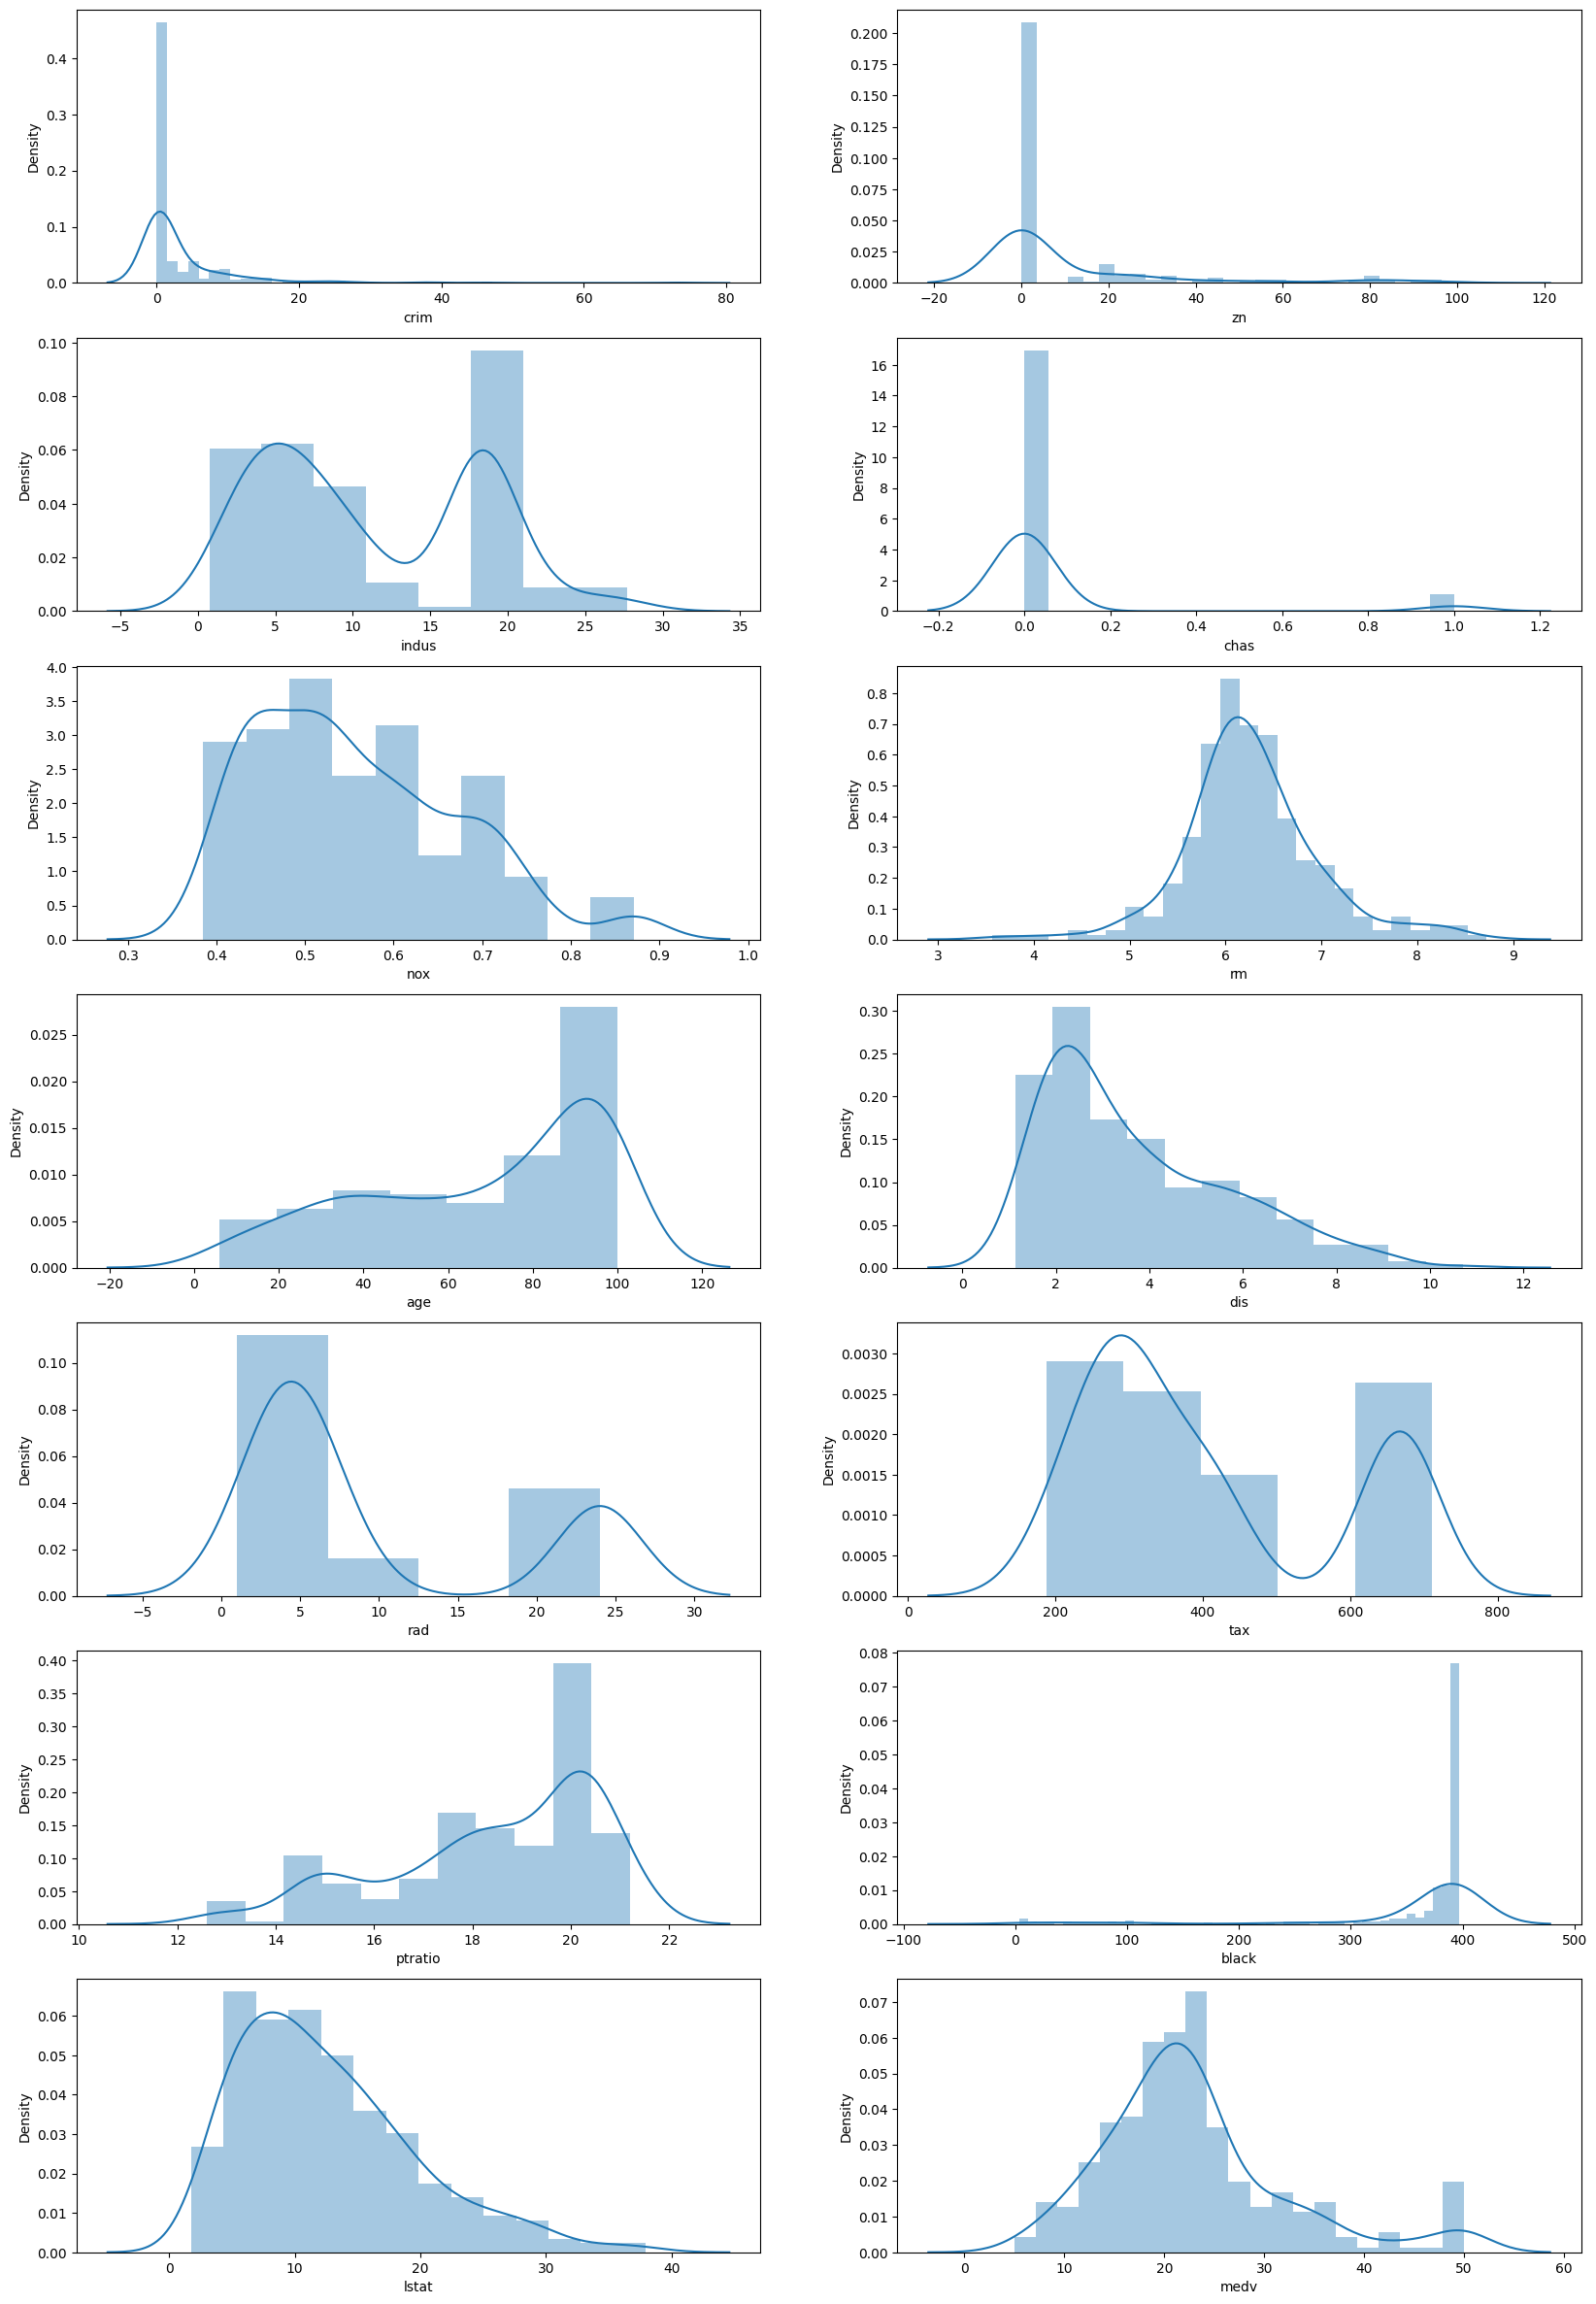

In [16]:
n_rows=7
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figheight(30)
fig.set_figwidth(20)
for i, column in enumerate(train_data.columns):
          sns.distplot(train_data[column],ax=axes[i//n_cols,i%n_cols])

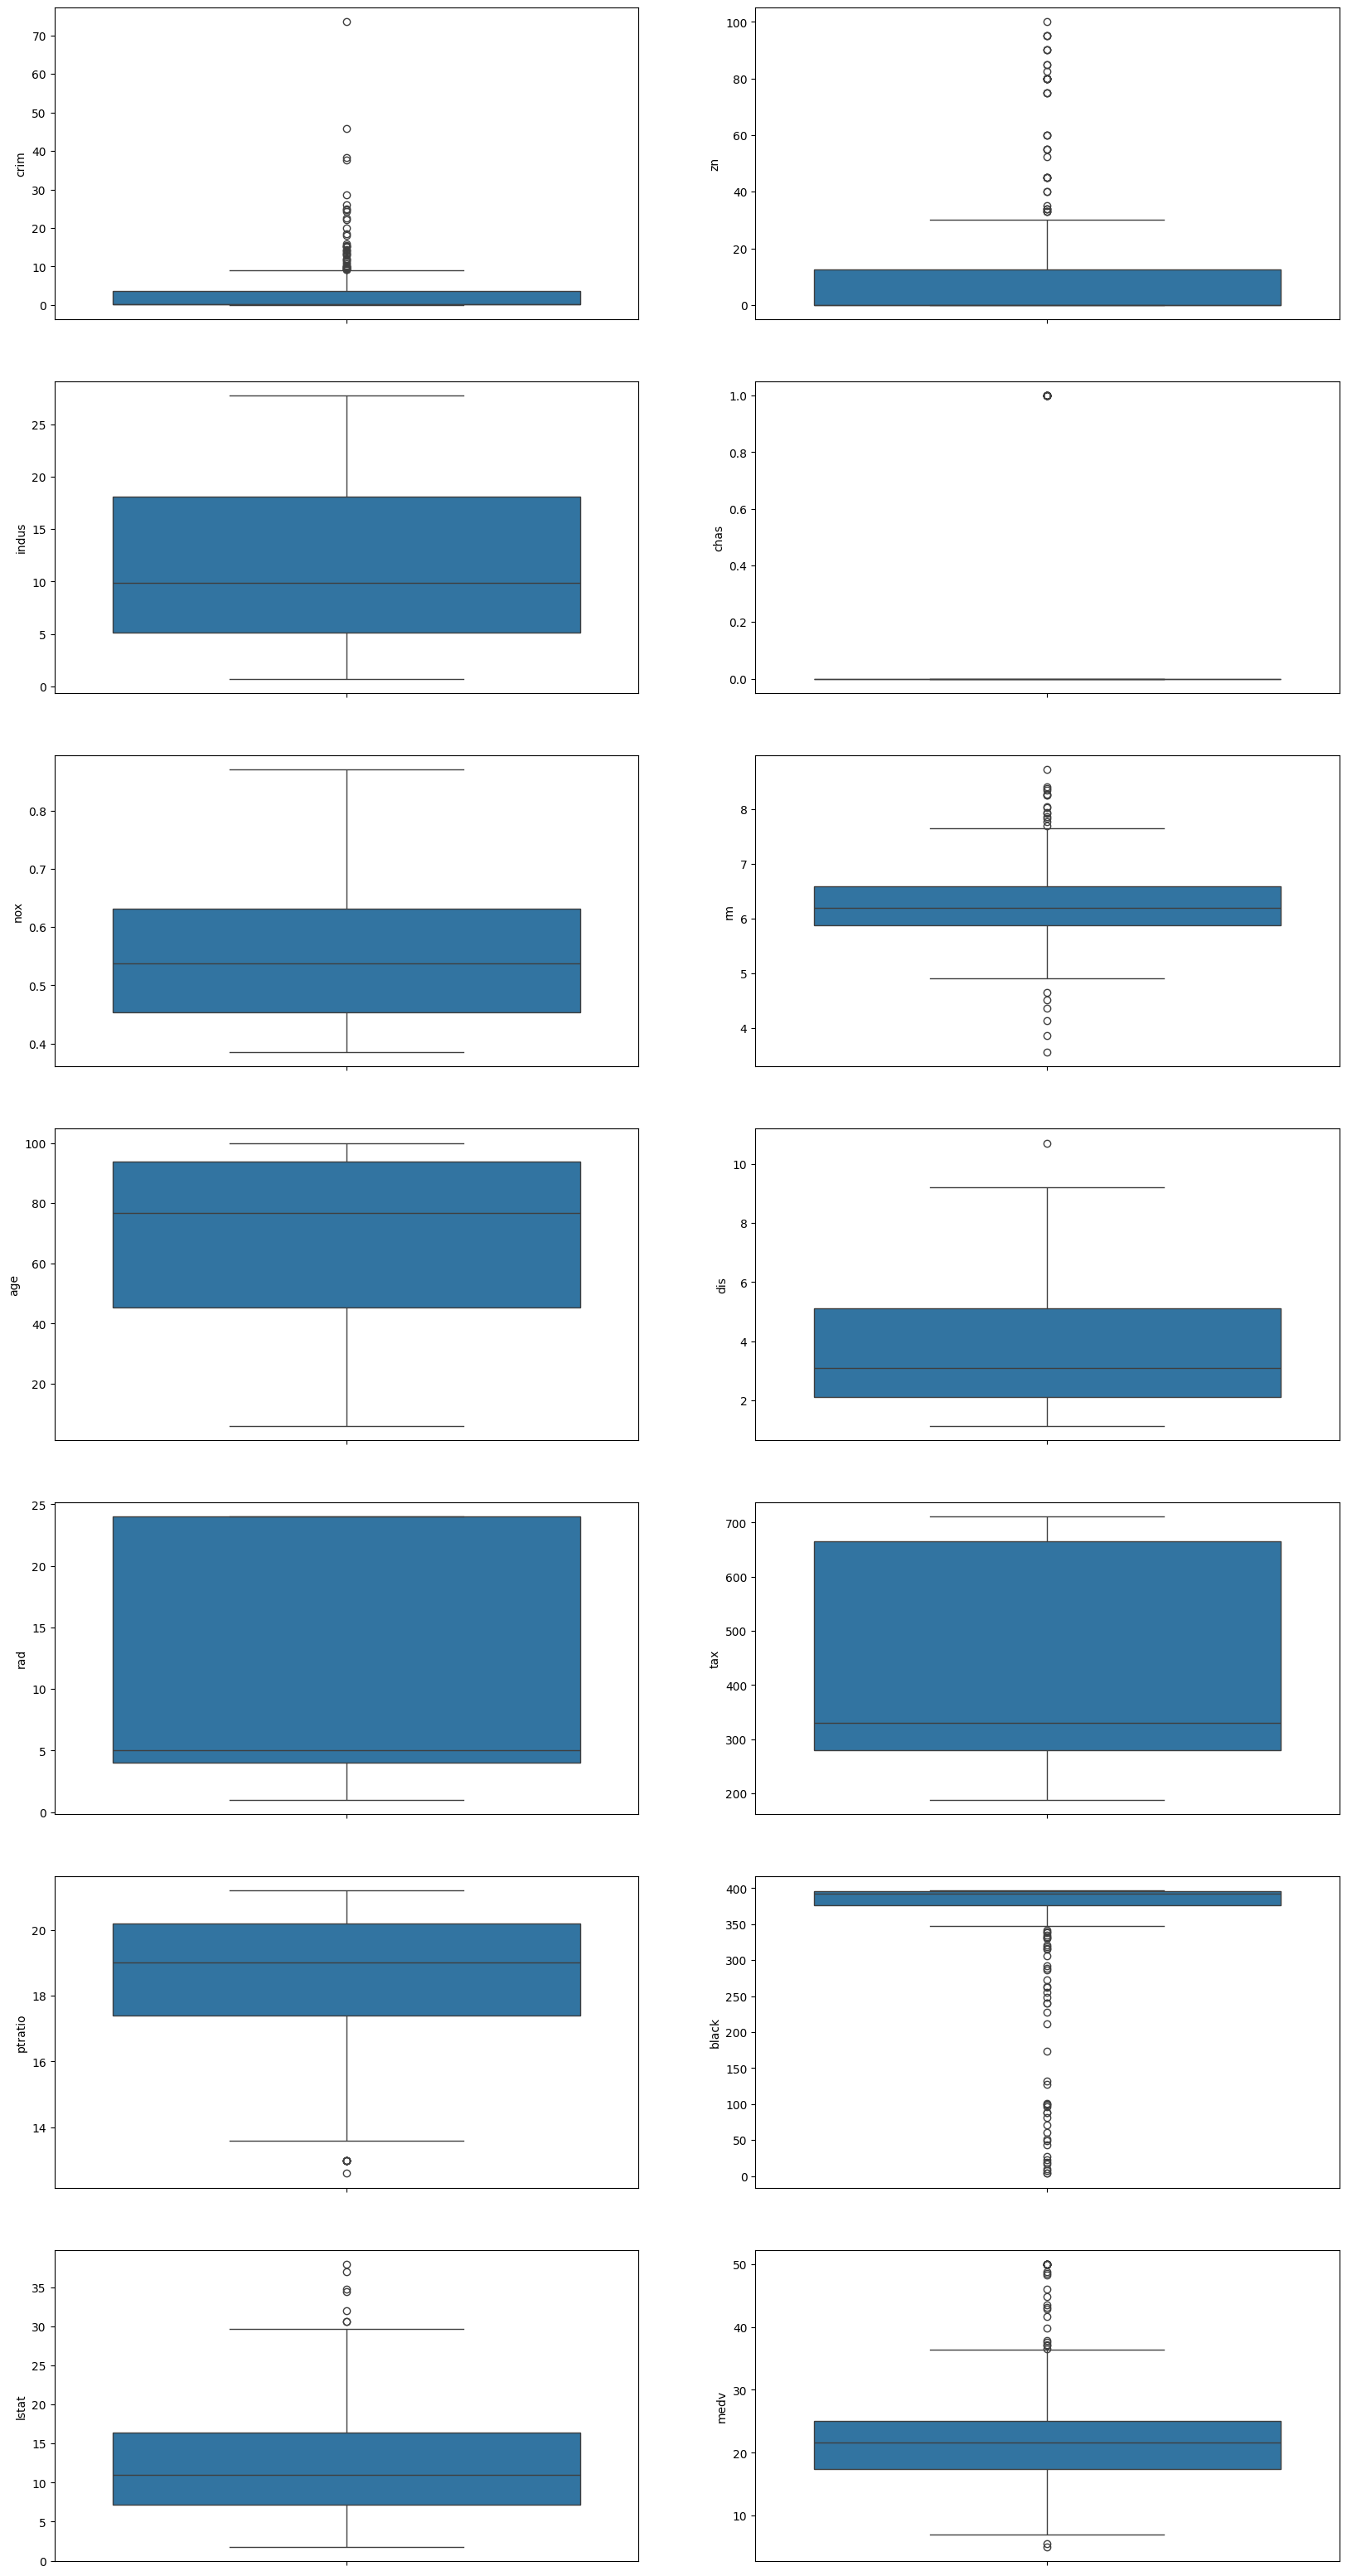

In [17]:
n_rows=7
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figheight(40)
fig.set_figwidth(20)
for i, column in enumerate(train_data.columns):
          sns.boxplot(train_data[column],ax=axes[i//n_cols,i%n_cols])

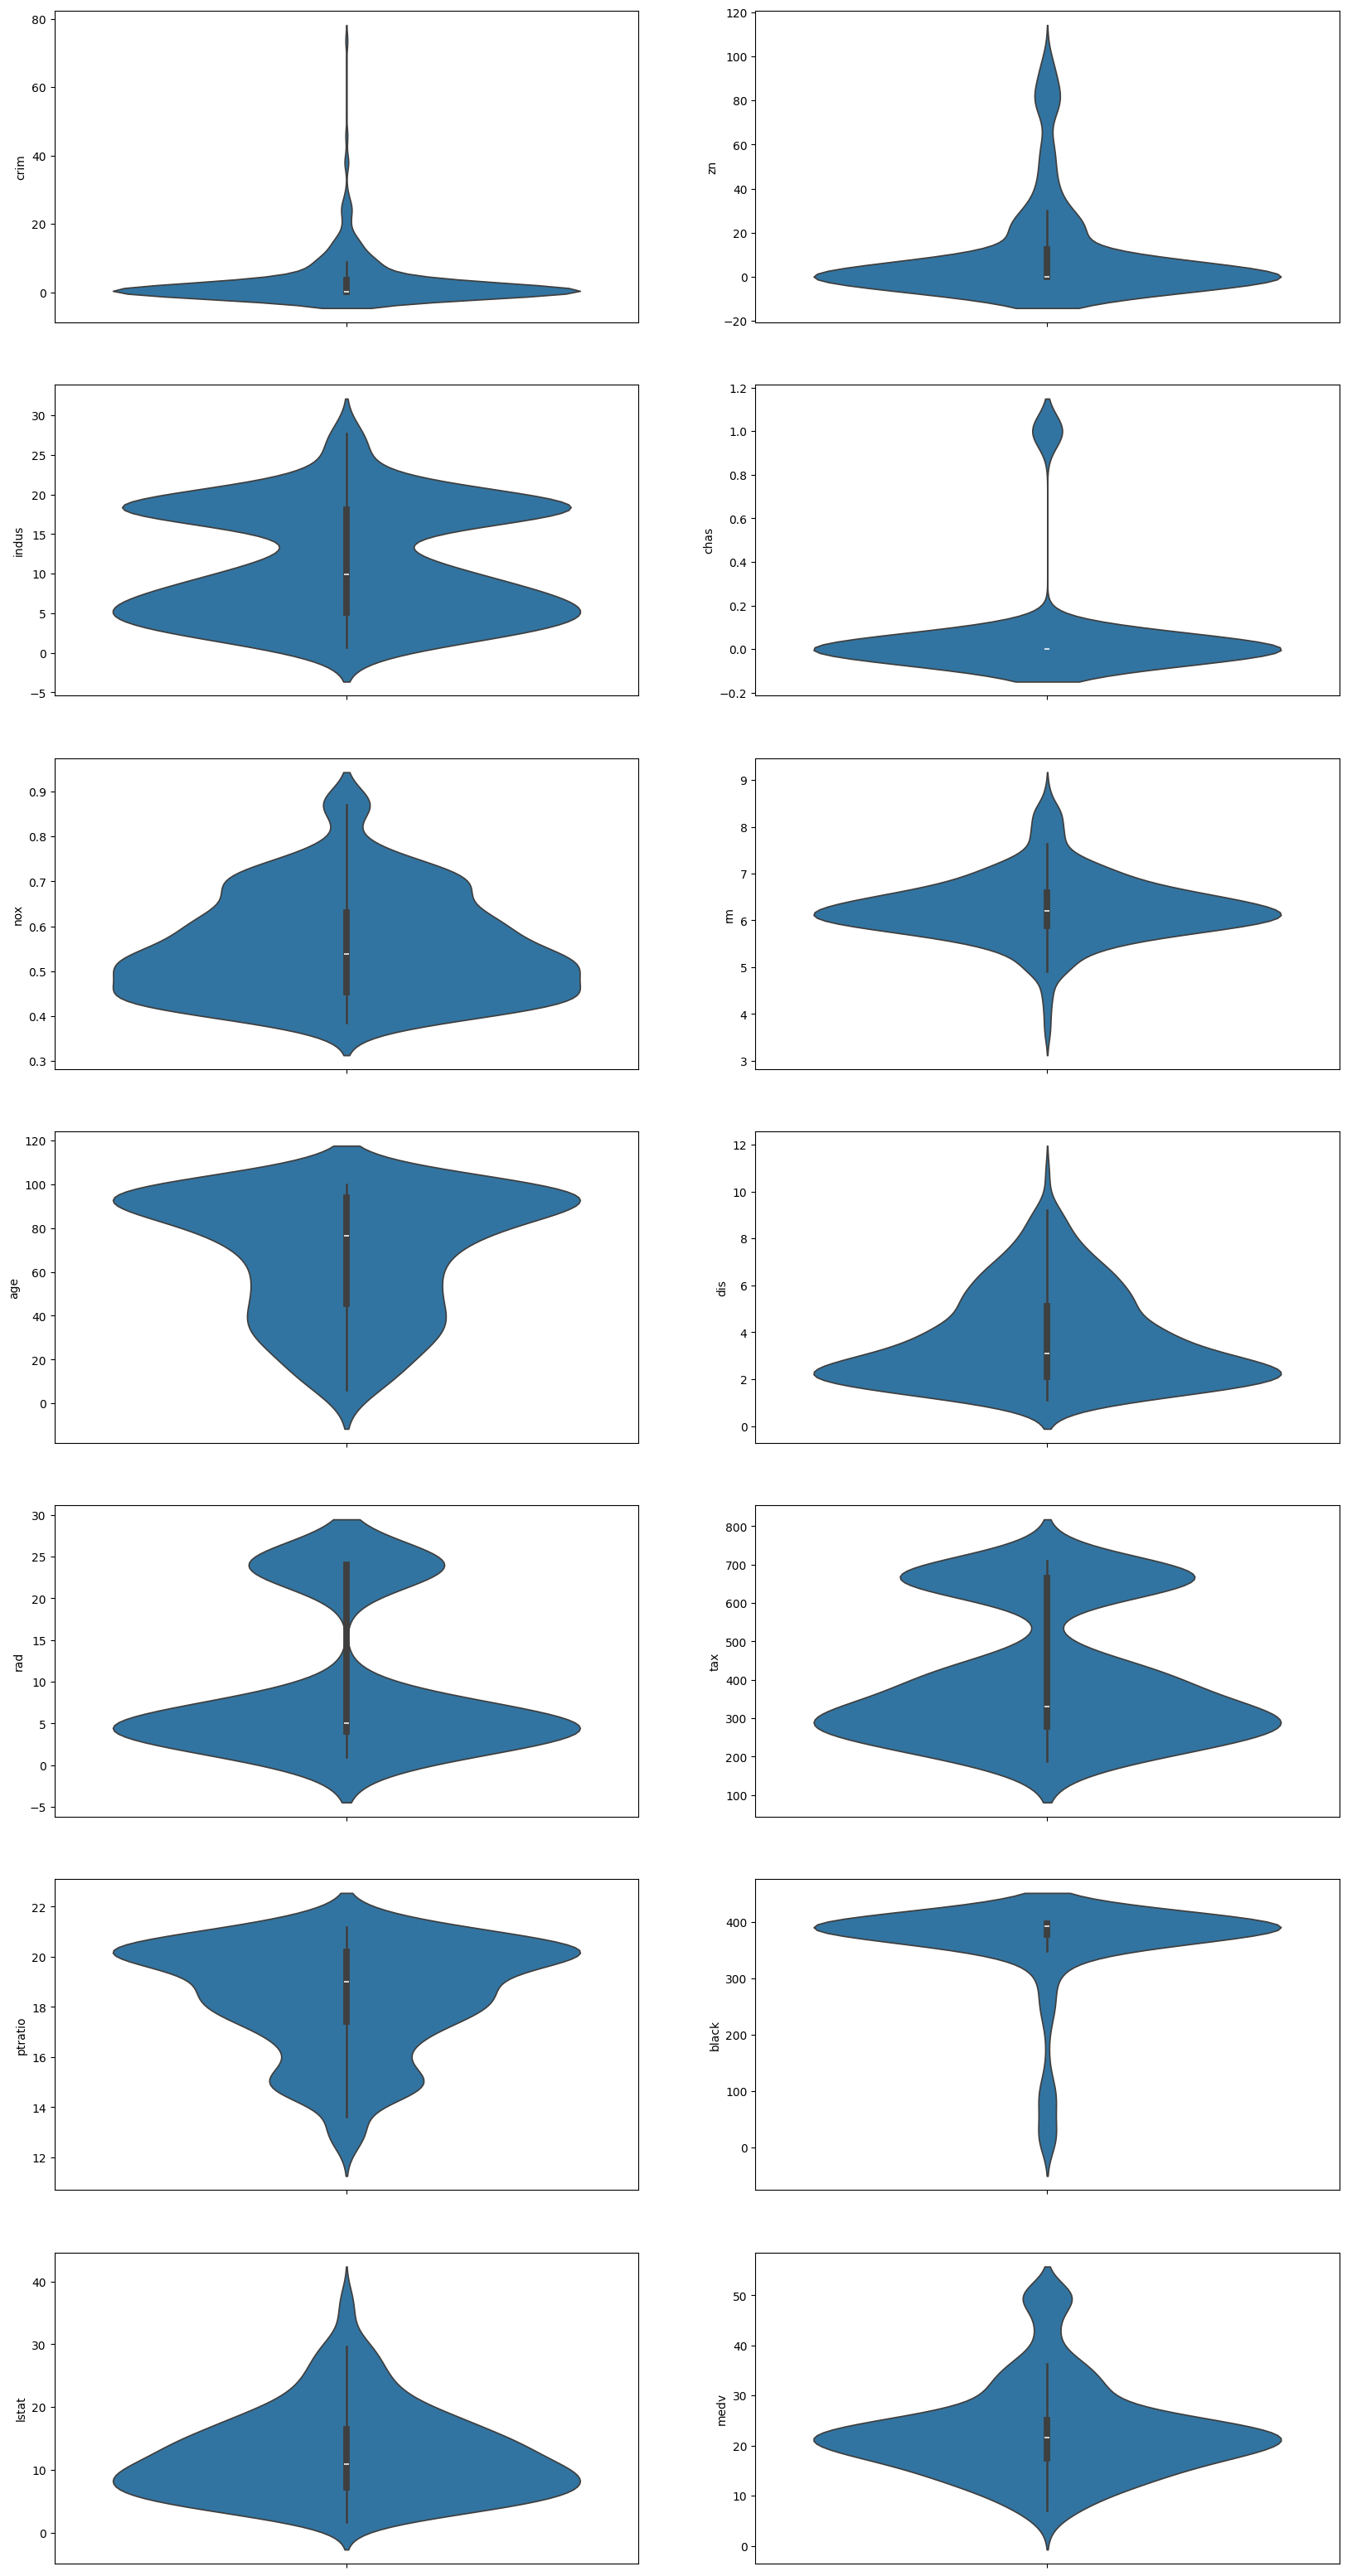

In [18]:
n_rows=7
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figheight(40)
fig.set_figwidth(20)
for i, column in enumerate(train_data.columns):
          sns.violinplot(train_data[column],ax=axes[i//n_cols,i%n_cols])

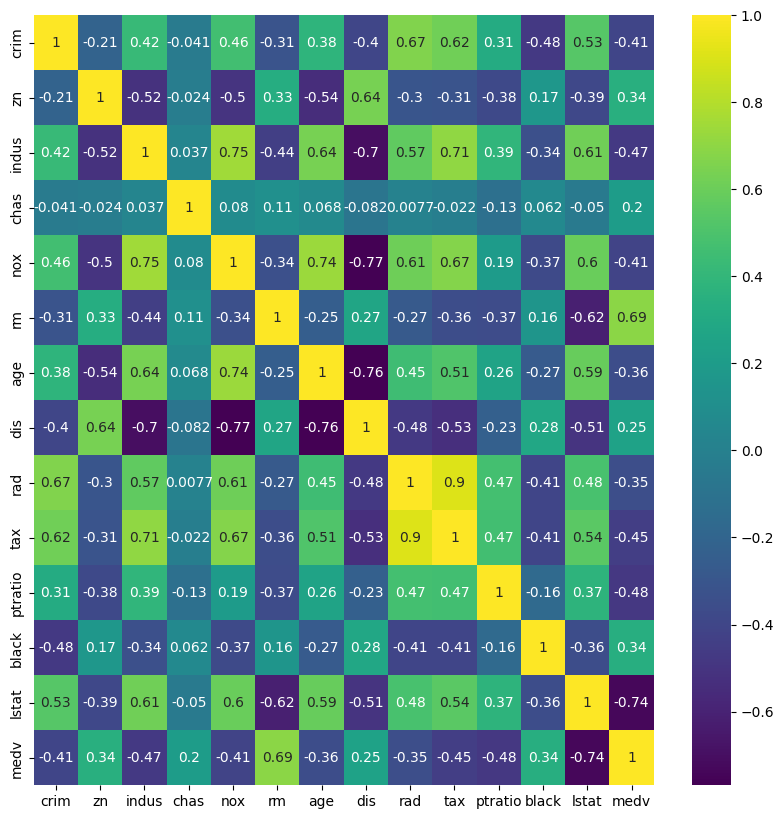

In [19]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(train_data.corr(numeric_only=True), cmap='viridis', annot= True )

TRAINING THE MODEL

In [20]:
train_data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [21]:
len(train_data.columns)

14

In [22]:
train_feature_set=train_data.iloc[:,:13]
#the target variable
train_target_var= train_data['medv']

In [23]:
train_feature_set.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [24]:
train_target_var.head()

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9


In [25]:
train_feature_set.shape

(333, 13)

In [26]:
train_target_var.shape

(333,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_feature_set,train_target_var,test_size = 0.2,random_state =4)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,roc_auc_score,mean_absolute_error

In [29]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

PERFORMANCE ANALYSIS

In [30]:
#using the model to predict
train_values_predicted=model.predict(X_train)
test_values_predicted = model.predict(X_test)

#evaluating the performance of the model

a= r2_score(Y_test,test_values_predicted)

print("R2 SCORE FOR TRAINING DATA",r2_score(Y_train,train_values_predicted))
print("R2 SCORE TESTING DATA ",a)
print("*"*20)

b=mean_squared_error(Y_test,test_values_predicted)
print("MEAN SQUARED TRAINING DATA ERROR",mean_squared_error(Y_train,train_values_predicted))
print("MEAN SQUARED TESTING DATA ERROR",b)
print("*"*20)

c=mean_absolute_error(Y_test,test_values_predicted)
print("*"*20)

d=np.sqrt(b)
print("RMSE_OF_MODEL",d)
print("*"*20)

e=np.log(d)
print("RMSLE_OF_MODEL",e)
print("*"*20)


R2 SCORE FOR TRAINING DATA 0.7241147962695874
R2 SCORE TESTING DATA  0.7424663414267876
********************
MEAN SQUARED TRAINING DATA ERROR 23.342392553935547
MEAN SQUARED TESTING DATA ERROR 20.744723445164123
********************
********************
RMSE_OF_MODEL 4.554637575610613
********************
RMSLE_OF_MODEL 1.516145961269873
********************


MAKING PREDICTIONS FOR TEST DATA

In [32]:
predictions=model.predict(test_data)

In [33]:
predictions

array([30.29994731, 25.11350194, 18.10646944,  8.92685378, 17.6775113 ,
       16.43985161, 18.69379504, 15.15039655, 12.91638793, 15.13655679,
       18.98886121, 20.23308282,  6.21395895, 13.79735611, 24.37126108,
       22.59725667, 23.3939582 , 27.24540032,  6.78188015, 27.21185242,
       21.08116085, 24.05242908, 20.29230872, 21.44744145, 20.65466359,
       22.61066228, 25.94018091, 27.48244039, 29.86453098, 28.4307589 ,
       34.82119049, 33.97685569, 31.44586414, 21.56569114, 18.49684973,
       20.07926672, 20.52102616, 20.13643289, 20.08452125, 23.99684572,
       14.3140087 , 20.37172237, 20.65863407, 17.03248972, 12.39294117,
       11.05724658,  7.65111879, 15.69540848, 19.09493868, 22.0907118 ,
       20.18757996, 34.56090711, 42.24515014, 27.20056344, 23.24054273,
       24.51056845, 32.22452256, 39.96653172, 34.92540181, 33.16022862,
       28.71639854, 35.66249352, 17.30447523, 17.38115362, 22.95193213,
       23.19402067, 24.6309823 , 28.82292147, 25.8018541 , 31.19

REMOVING OUTLIERS

In [34]:
for i in train_data.columns:

    mean = np.mean(train_data[i])
    std_dev = np.std(train_data[i])
    print(i)
    print('Mean : ',mean)
    print("Standard Deviation : ",std_dev)

    z_threshold = 3

    #z_scores = [(x - mean) / std_dev for x in train_data[i]]

    outliers = [ x for x in train_data[i] if abs((x - mean) / std_dev)>z_threshold ]
    print("Outliers detected using Z-score:", len(outliers))
    print("*"*50)


crim
Mean :  3.360341471471471
Standard Deviation :  7.341224089237798
Outliers detected using Z-score: 6
**************************************************
zn
Mean :  10.68918918918919
Standard Deviation :  22.64069000908167
Outliers detected using Z-score: 17
**************************************************
indus
Mean :  11.293483483483483
Standard Deviation :  6.987607511603216
Outliers detected using Z-score: 0
**************************************************
chas
Mean :  0.06006006006006006
Standard Deviation :  0.23759808342165148
Outliers detected using Z-score: 20
**************************************************
nox
Mean :  0.5571441441441441
Standard Deviation :  0.11478177415827898
Outliers detected using Z-score: 0
**************************************************
rm
Mean :  6.2656186186186185
Standard Deviation :  0.7028937966599768
Outliers detected using Z-score: 6
**************************************************
age
Mean :  68.22642642642643
Standard Deviation :

In [35]:
train_data[i].shape

(333,)

In [36]:
for i in train_data.columns:
  if i!='medv':
    mean = np.mean(train_data[i])
    std_dev = np.std(train_data[i])

    z_threshold = 3

    z_scores = [(x - mean) / std_dev for x in train_data[i]]
    outliers = [ x for x in train_data[i] if abs((x - mean) / std_dev)>z_threshold ]
    indexes=train_data[train_data[i].apply(lambda x : x in outliers)].index
    train_data.drop(indexes, inplace=True)


In [37]:
train_data[i].shape

(263,)

In [38]:
for i in train_data.columns:

    mean = np.mean(train_data[i])
    std_dev = np.std(train_data[i])
    print(i)
    print('Mean : ',mean)
    print("Standard Deviation : ",std_dev)

    z_threshold = 3

    #z_scores = [(x - mean) / std_dev for x in train_data[i]]

    outliers = [ x for x in train_data[i] if abs((x - mean) / std_dev)>z_threshold ]
    print("Outliers detected using Z-score:", len(outliers))
    print("*"*50)


crim
Mean :  2.2774902281368816
Standard Deviation :  4.474324055028342
Outliers detected using Z-score: 5
**************************************************
zn
Mean :  7.346007604562738
Standard Deviation :  15.19461998393563
Outliers detected using Z-score: 8
**************************************************
indus
Mean :  11.133269961977186
Standard Deviation :  6.912920450522876
Outliers detected using Z-score: 0
**************************************************
chas
Mean :  0.0
Standard Deviation :  0.0
Outliers detected using Z-score: 0
**************************************************
nox
Mean :  0.5511250950570342
Standard Deviation :  0.10732543726585302
Outliers detected using Z-score: 0
**************************************************
rm
Mean :  6.241589353612167
Standard Deviation :  0.5833730998039482
Outliers detected using Z-score: 4
**************************************************
age
Mean :  67.51863117870722
Standard Deviation :  27.933915681025052
Outliers dete

In [39]:
train_feature_set=train_data.iloc[:,:13]
#the target variable
train_target_var= train_data['medv']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_feature_set,train_target_var,test_size = 0.2,random_state =4)

MODEL WITHOUT OUTLIERS

In [41]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)

LinearRegression()

PERFORMANCE ANALYSIS

In [42]:
#using the model to predict
train_values_predicted=model.predict(X_train)
test_values_predicted = model.predict(X_test)

#evaluating the performance of the model

a= r2_score(Y_test,test_values_predicted)

print("R2 SCORE FOR TRAINING DATA",r2_score(Y_train,train_values_predicted))
print("R2 SCORE TESTING DATA ",a)
print("*"*20)

b=mean_squared_error(Y_test,test_values_predicted)
print("MEAN SQUARED TRAINING DATA ERROR",mean_squared_error(Y_train,train_values_predicted))
print("MEAN SQUARED TESTING DATA ERROR",b)
print("*"*20)

c=mean_absolute_error(Y_test,test_values_predicted)
print("*"*20)

d=np.sqrt(b)
print("RMSE_OF_MODEL",d)
print("*"*20)

e=np.log(d)
print("RMSLE_OF_MODEL",e)
print("*"*20)


R2 SCORE FOR TRAINING DATA 0.6637759592020361
R2 SCORE TESTING DATA  0.7042868783405376
********************
MEAN SQUARED TRAINING DATA ERROR 19.936178443722756
MEAN SQUARED TESTING DATA ERROR 20.011733339280017
********************
********************
RMSE_OF_MODEL 4.473447589866234
********************
RMSLE_OF_MODEL 1.4981593842481025
********************


PREDICTING FOR TEST DATA

In [44]:
predictions=model2.predict(test_data)

In [45]:
predictions

array([29.70723326, 24.789533  , 16.47920059,  7.97784846, 16.49408665,
       16.38100722, 18.59098003, 14.50478436, 14.59564173, 14.90849806,
       18.5121416 , 20.2161553 , 10.7434658 , 13.88687543, 23.69464812,
       22.75434579, 23.75880308, 29.00639249,  5.76996865, 27.49445649,
       21.04349597, 23.25645996, 20.72803796, 22.71666916, 20.76313921,
       22.69283423, 26.21478133, 26.66245462, 28.43755206, 28.98755407,
       34.30831338, 35.00520729, 31.30632752, 21.03471018, 17.79892363,
       21.1364769 , 19.56337589, 19.20055856, 20.47876384, 21.51129898,
       13.28401161, 19.29638573, 19.64214057, 16.25538281, 12.49345166,
        9.96848992,  6.79951812, 19.60066014, 18.63174006, 18.36976551,
       23.21907184, 32.29562978, 36.02948029, 26.58140505, 21.5651732 ,
       24.0824996 , 32.45809062, 39.50488551, 33.94851571, 32.32489223,
       29.43302481, 36.03758026, 16.69140939, 12.07832187, 17.97465146,
       19.6729768 , 24.6799873 , 26.95069859, 20.25229861, 25.42